I want to test that the sampler converges for many different starting conditions are true values. So I randomized the true and initial values. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from pymc import MCMC
import seaborn
import numpy as np
from parmed.topologyobjects import DihedralType
from simtk import unit
from torsionfit.toy_model import ToyModel
import torsionfit.backends.sqlite_plus as db

In [2]:
toy = ToyModel(n_increments=30, sample_phase=True, rj=True)

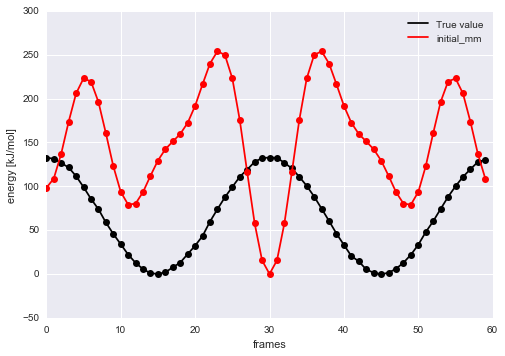

In [8]:
# Initial and True values are randomized. RJ is on and phases are discrete (0, 180)
toy = ToyModel(n_increments=30, sample_phase=True, rj=True)
plt.plot(toy.synthetic_energy, color='black', label='True value')
plt.plot(toy.synthetic_energy, 'ko')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
plt.plot(toy.scan_set.mm_energy, color='r', label='initial_mm')
plt.plot(toy.scan_set.initial_mm, 'ko', color='r')
plt.legend()

In [9]:
# sample
sampler = MCMC(toy.model.pymc_parameters, db=db, dbname='discrete_phase_rj_randomized.sqlite')
sampler.sample(iter=10000)

 [-----------------100%-----------------] 10000 of 10000 complete in 573.3 sec

In [3]:
sampler = db.load('discrete_phase_rj_randomized.sqlite')

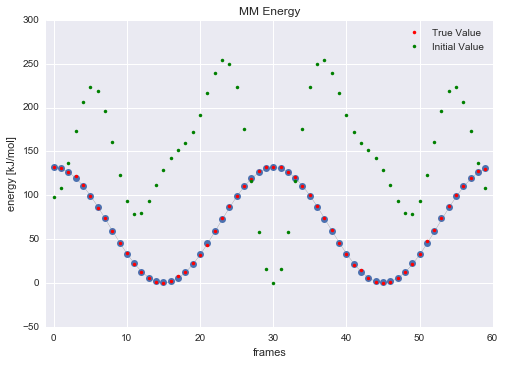

In [11]:
seaborn.tsplot(sampler.trace('mm_energy')[:], interpolate=False)
plt.plot(toy.synthetic_energy, '.', color='r', label='True Value')
plt.title('MM Energy')
plt.xlabel('frames')
plt.ylabel('energy [kJ/mol]')
#plt.plot(sampler.trace('mm_energy')[0])
plt.plot(toy.scan_set.initial_mm, '.', color='g', label='Initial Value')
plt.legend()
plt.savefig('energy_fit_discrete_randomized.pdf')

The fit looks good! Now let's see how long it takes for sigma to equilibrate.

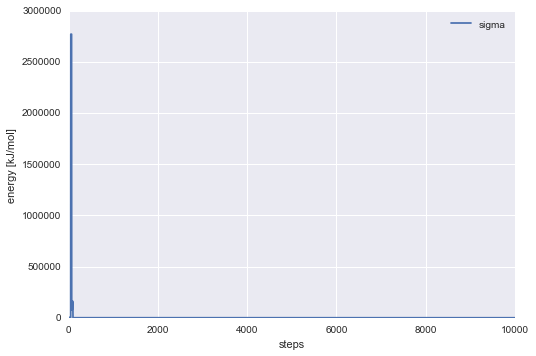

In [12]:
plt.plot(np.exp(sampler.trace('sigma')[:]), label='sigma')
plt.legend()
plt.xlabel('steps')
plt.ylabel('energy [kJ/mol]')
plt.savefig('sigma_discrete_randomized.pdf')

In [7]:
import pymbar.timeseries as ts
[t, g, N_eff] = ts.detectEquilibration(sampler.trace('sigma')[:])

In [8]:
print('Start of equilibrated data: {}'.format(t))

Start of equilibrated data: 503


Sigma does take an order of magnitude longer to equilibrate but the initial value was very far off from the true value

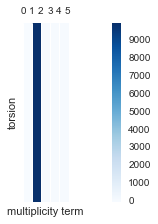

In [4]:
import torsionfit.plots as plots
plots.marg_mult(toy.model, sampler, 10000, 0)
plt.savefig('multiplicity_discrete_random.pdf')

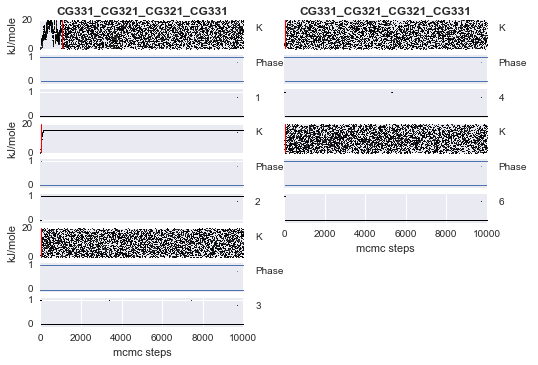

In [18]:
plots.trace_plots('CG331_CG321_CG321_CG331', sampler, markersize=2.0, filename='traces_discrete_rj_random.pdf')

In [19]:
toy.true_value

<DihedralTypes [<DihedralType; phi_k=15.843, per=2, phase=0.000,  scee=1.000, scnb=1.000>]>

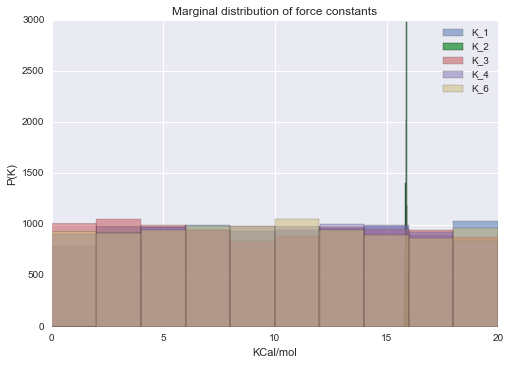

In [39]:
alpha = 0.5
plt.hist(sampler.CG331_CG321_CG321_CG331_1_K.trace[t:], label='K_1', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_2_K.trace[t:], label='K_2')
plt.hist(sampler.CG331_CG321_CG321_CG331_3_K.trace[t:], label='K_3', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_4_K.trace[t:], label='K_4', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_6_K.trace[t:], label='K_6', alpha=alpha)

plt.legend()
plt.title('Marginal distribution of force constants')
plt.xlabel('KCal/mol')
plt.ylabel('P(K)')

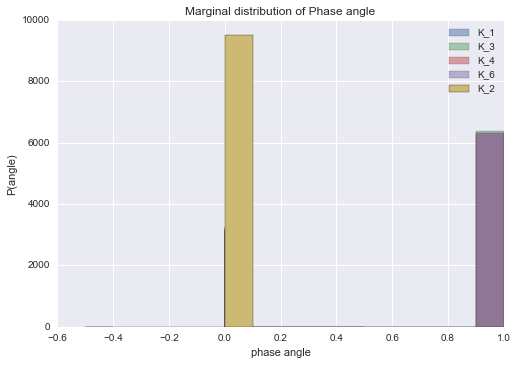

In [38]:
alpha = 0.5
plt.hist(sampler.CG331_CG321_CG321_CG331_1_Phase.trace[t:], label='K_1', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_3_Phase.trace[t:], label='K_3', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_4_Phase.trace[t:], label='K_4', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_6_Phase.trace[t:], label='K_6', alpha=alpha)
plt.hist(sampler.CG331_CG321_CG321_CG331_2_Phase.trace[t:], label='K_2')


plt.legend()
plt.title('Marginal distribution of Phase angle')
plt.xlabel('phase angle')
plt.ylabel('P(angle)')

### Marginal distribution of parameter where label is on

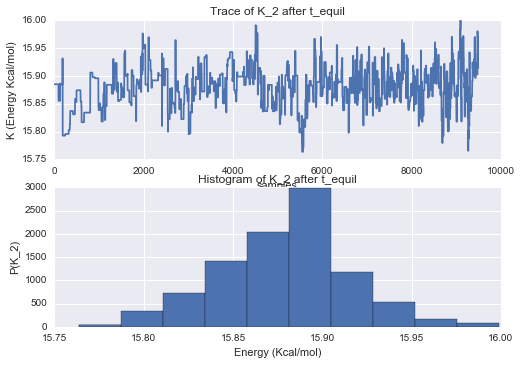

In [9]:
plt.subplot(2, 1, 1)
plt.title('Trace of K_2 after t_equil')
plt.plot(sampler.CG331_CG321_CG321_CG331_2_K[t:])
plt.xlabel('samples')
plt.ylabel('K (Energy Kcal/mol)')
plt.subplot(2, 1, 2)
plt.title('Histogram of K_2 after t_equil')
plt.hist(sampler.CG331_CG321_CG321_CG331_2_K[t:], label='K_2')
plt.xlabel('Energy (Kcal/mol)')
plt.ylabel('P(K_2)')
plt.savefig('trace_hist_label_on_random.pdf')